# Exercise 1
```In this exercise you will experience with pandas, matplotlib and numpy. This are main tools we are going to use later in course, and which are extremly useful in a variety of tasks. For each question, answer it in cells directly beneath it.```

```You are more than encourged to read relevant parts, mainly from ``` [pandas' API](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)

```~ Ittai Haran```

## DataFrame basics

```A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames```

```import numpy and pandas```

In [0]:
import pandas as pd
import numpy as np

```Consider the following Python dictionary `data` and Python list `labels`:```

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

```Create a DataFrame `df` from this dictionary `data` which has the index `labels`.```

In [0]:
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, index=labels)

df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Display a summary of the basic information about this DataFrame and its data using the decribe and the info functions```

In [0]:
print('Description')
df.describe(include='all')

Description


,animal,age,visits,priority
count,10,8.000000,10.000000,10
unique,3,NaN,NaN,2
top,cat,NaN,NaN,no
freq,4,NaN,NaN,6
mean,NaN,3.437500,1.900000,NaN
std,NaN,2.007797,0.875595,NaN
min,NaN,0.500000,1.000000,NaN
25%,NaN,2.375000,1.000000,NaN
50%,NaN,3.000000,2.000000,NaN
75%,NaN,4.625000,2.750000,NaN


In [0]:
print('Information')
df.info()

Information
<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, a to j
Data columns (total 4 columns):
animal      10 non-null object
age         8 non-null float64
visits      10 non-null int64
priority    10 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 400.0+ bytes


```Return the first 3 rows of the DataFrame `df`. Do it two times: use head and iloc```

In [0]:
print('First Three Rows')
df.head(3)

First Three Rows


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


In [0]:
print('First Three Rows')
df.iloc[0:3]

First Three Rows


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


```Select just the 'animal' and 'age' columns from the DataFrame `df`.```

In [0]:
df[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


```Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.```

In [0]:
df[['animal','age']].iloc[[3,4,8]]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


```Select only the rows where the number of visits is greater than 3. Pandas supports two useful APIs:
(df[boolean list/series]) returns the rows for which the value is True
(df[column] > num) returns a boolean series```

In [0]:
df[df['visits']>3]

,animal,age,visits,priority


```Select the rows where the age is missing, i.e. is `NaN`.```

In [0]:
df[df['age'].isna()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


```Select the rows where the animal is a cat *and* the age is less than 3. You can use logical operands: &, |, ~```

In [0]:
df[(df['animal']=='cat')&(df['age']<3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


```Select the rows the age is between 2 and 4 (inclusive).```

In [0]:
df[(df['age']<=4)&(df['age']>=2)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


```Change the age in row 'f' to 1.5.```

In [0]:
df.at['f', 'age']=1.5

df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Calculate the sum of all visits (the total number of visits). Do it twice: using built in pandas functions and using numpy```

In [0]:
print('Pandas Sum')
df['visits'].sum()

Pandas Sum


19

In [0]:
print('Numpy Sum')
np.sum(df['visits'])

Numpy Sum


19

```Calculate the mean age for each different animal in `df`.```

In [0]:
print('Pandas Mean')
df.groupby('animal').aggregate('mean')
    

Pandas Mean


,age,visits
animal,,
cat,2.333333,2.0
dog,5.000000,2.0
snake,2.500000,1.5


```Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.```

In [0]:
print('Add Row')
row = pd.DataFrame({'animal': ['god'], 'age': [np.pi], 'visits': [100], 'priority': ['yes']}, index = ['k'])

df = df.append(row)

df

Add Row


,animal,age,visits,priority
a,cat,2.500000,1,yes
b,cat,3.000000,3,yes
c,snake,0.500000,2,no
d,dog,NaN,3,yes
e,dog,5.000000,2,no
f,cat,1.500000,3,no
g,snake,4.500000,1,no
h,cat,NaN,1,yes
i,dog,7.000000,2,no
j,dog,3.000000,1,no


In [0]:
print('Delete Row')
df = df.drop(index='k')

df

Delete Row


,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


```Count the number of each type of animal in `df`.```

In [0]:
df['animal'].value_counts()

cat      4
dog      4
snake    2
Name: animal, dtype: int64

```Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order. You can use the sort_values function```

In [0]:
print('Sort By Descending Age')
df.sort_values(by='age', ascending=False)

Sort By Descending Age


,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
b,cat,3.0,3,yes
j,dog,3.0,1,no
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
d,dog,NaN,3,yes
h,cat,NaN,1,yes


In [0]:
print('Sort By Ascending Visits')
df.sort_values(by='visits', ascending=True)

Sort By Ascending Visits


,animal,age,visits,priority
a,cat,2.5,1,yes
g,snake,4.5,1,no
h,cat,NaN,1,yes
j,dog,3.0,1,no
c,snake,0.5,2,no
e,dog,5.0,2,no
i,dog,7.0,2,no
b,cat,3.0,3,yes
d,dog,NaN,3,yes
f,cat,1.5,3,no


```The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.```

In [0]:
df['priority'] = df['priority'].str.replace('yes', 'True')
df['priority'] = df['priority'].str.replace('no', 'False')

df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,snake,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,snake,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


```In the 'animal' column, change the 'snake' entries to 'python'.```

In [0]:
df['animal'] = df['animal'].str.replace('snake','python')

df

,animal,age,visits,priority
a,cat,2.5,1,True
b,cat,3.0,3,True
c,python,0.5,2,False
d,dog,NaN,3,True
e,dog,5.0,2,False
f,cat,1.5,3,False
g,python,4.5,1,False
h,cat,NaN,1,True
i,dog,7.0,2,False
j,dog,3.0,1,False


```For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).```

In [0]:
table = df.pivot_table(values='age', index=['animal'], columns=['visits'], aggfunc='mean')

table

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


```Now you will be asked to generate your own test data and manipulate it using functions you will have to create.```

```Create a dataframe with 1000 rows and 3 columns. The columns are to be the following:```
```
        - age: an integer, uniformly distributed between 20 to 65
        - skill: a float, normally distributed between 0 and 1, with expected value = 0.5 and standard deviation = 0.3
        - height: a float with 2 digits after the decimal point, between 1.5 to 2.0
```
```you might want to use numpy.random```

In [0]:
ages = np.random.randint(20, 66, (1000))
skill = np.random.normal(0.5, 0.3, (1000)).clip(0,1)
height = np.around(np.random.uniform(1.5, 2.0, (1000)), 2)

ndf = pd.DataFrame({'age':ages,'skill':skill,'height':height}, index=np.arange(1000))

ndf

,age,skill,height
0,28,0.250589,1.88
1,40,0.373725,1.94
2,36,0.000000,1.65
3,42,0.465362,1.86
4,54,0.415533,1.58
5,20,0.185103,1.59
6,52,0.275061,1.69
7,55,0.872759,1.79
8,62,1.000000,1.52
9,40,0.956774,1.89


```Add the dataframe a new columns, called salary, when:```
        <center>$salary = 1000\cdot((age^2)/1000 + 1.7\cdot skill + 0.4\cdot exp(-(height-1.7)^2)$<center>

In [0]:
salary = 1000*((np.array(ndf['age']))**2/1000+1.7*np.array(ndf['skill'])+0.4*np.exp(-(np.array(ndf['height'])-1.7)**2))

ndf.insert(loc=len(ndf.columns), column='salary', value=salary)

ndf

,age,skill,height,salary
0,28,0.250589,1.88,1597.249095
1,40,0.373725,1.94,2612.942927
2,36,0.000000,1.65,1695.001249
3,42,0.465362,1.86,2945.005745
4,54,0.415533,1.58,4016.686594
5,20,0.185103,1.59,1109.864695
6,52,0.275061,1.69,3571.563448
7,55,0.872759,1.79,4905.463631
8,62,1.000000,1.52,5931.247703
9,40,0.956774,1.89,3612.333348


```Split the dataframe to groups by the age left digit and by the age. for each group compute:```
```
        - the number of rows
        - the mean salary
        - the maximum height     
```

```To do so, read about the groupby and agg functions is the ``` [pandas API](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)

In [0]:
print('By Age')
grouped = ndf.groupby(['age'])

for name, group in grouped:
    mean_salary = group.aggregate('mean')['salary']
    max_height = group.aggregate('max')['height']
    print('Age: ', name, ', Number of Rows: ', len(group), ', Mean Salary: ', mean_salary, ', Max Height: ', max_height)

By Age
Age:  20 , Number of Rows:  21 , Mean Salary:  1507.4434012842237 , Max Height:  1.99
Age:  21 , Number of Rows:  22 , Mean Salary:  1511.2135971907949 , Max Height:  2.0
Age:  22 , Number of Rows:  24 , Mean Salary:  1762.6191264475399 , Max Height:  1.98
Age:  23 , Number of Rows:  27 , Mean Salary:  1699.522312398418 , Max Height:  2.0
Age:  24 , Number of Rows:  15 , Mean Salary:  1840.8658744278255 , Max Height:  1.96
Age:  25 , Number of Rows:  17 , Mean Salary:  1942.3249614800554 , Max Height:  1.94
Age:  26 , Number of Rows:  20 , Mean Salary:  1900.9346896010054 , Max Height:  1.96
Age:  27 , Number of Rows:  27 , Mean Salary:  1999.7452233571867 , Max Height:  1.98
Age:  28 , Number of Rows:  18 , Mean Salary:  2172.130157643353 , Max Height:  1.99
Age:  29 , Number of Rows:  27 , Mean Salary:  2092.8058535671767 , Max Height:  1.99
Age:  30 , Number of Rows:  26 , Mean Salary:  2320.289544767912 , Max Height:  1.99
Age:  31 , Number of Rows:  19 , Mean Salary:  2044.

In [0]:
print('By Age\'s Left Digit')
nndf = ndf.copy(deep=True)
nndf['age'] = (np.array(nndf['age'])/10).astype(np.int)

grouped = nndf.groupby(['age'])

for name, group in grouped:
    mean_salary = group.aggregate('mean')['salary']
    max_height = group.aggregate('max')['height']
    print('Age: ', name, ', Number of Rows: ', len(group), ', Mean Salary: ', mean_salary, ', Max Height: ', max_height)

By Age's Left Digit
Age:  2 , Number of Rows:  218 , Mean Salary:  1841.0155972605571 , Max Height:  2.0
Age:  3 , Number of Rows:  219 , Mean Salary:  2427.639284093858 , Max Height:  2.0
Age:  4 , Number of Rows:  212 , Mean Salary:  3209.112352340362 , Max Height:  2.0
Age:  5 , Number of Rows:  228 , Mean Salary:  4189.472569523085 , Max Height:  2.0
Age:  6 , Number of Rows:  123 , Mean Salary:  5157.028440411281 , Max Height:  2.0


```Now split the dataframe to groups by age. For each group compute the mean salary, divided by the sum of heights.```

In [0]:
grouped = ndf.groupby(['age']).agg({'salary':'mean','height':'sum'})

grouped = grouped['salary']/grouped['height']

grouped

age
20     40.774774
21     39.019200
22     41.778126
23     35.689255
24     72.934464
25     66.449708
26     53.412045
27     41.574745
28     68.673100
29     43.392201
30     50.452045
31     61.190498
32     46.044057
33     80.526270
34     93.704738
35     38.007393
36     58.849471
37     77.566972
38     68.794258
39    121.772445
40     56.848070
41     89.109291
42    113.818388
43    113.098465
44     95.767246
45     85.951627
46     74.965934
47    123.255517
48     71.845188
49     85.051646
50     75.063199
51     82.267939
52     88.754170
53     90.966744
54     90.879946
55    137.907850
56    127.327467
57    116.334631
58    147.943709
59    163.636312
60    138.782147
61    145.580583
62    141.409720
63    131.659087
64    143.501361
65    172.143275
dtype: float64

```Add these lines to your code:```
```python
        import matplotlib.pyplot as plt
        %matplotlib inline
``` 
       
```Now try using the pd.DataFrame.plot function to show your data. Try also using pd.DataFrame.boxplot.```

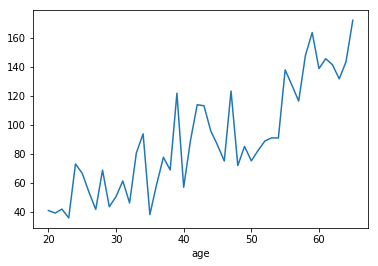

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

grouped.plot()

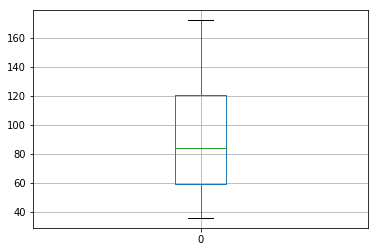

In [0]:
pd.DataFrame(grouped).boxplot()

```Save the result as a csv```

In [0]:
grouped.to_csv(r'C:\Users\t8658103\Desktop\Talpiot\Machine Learning and Data Science\ex1\DataFrame.csv')

## Working with real-life data

```read the csv file entitled house_prices_numeric.csv consider writing the following line of code:```
```python
pd.options.display.max_columns=50
```

In [0]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns=50

In [5]:
df = pd.read_csv(r'C:\Users\t8658103\Desktop\Talpiot\Machine Learning and Data Science\ex1\house_prices_numeric.csv')

df

FileNotFoundError: ignored

```In the following questions, print your answer if possible, draw a graph or visualize it in any other means. When drawing a graph, add a title to it. Answer the following questions (try using a single line of code for each):```
```
- What is oldest house in the dataset (YearBuilt)?
- What is the highest price (SalePrice) of houses built in that year?
- What is the mean area (LotArea) of houses?
- What is the 50-percentile of the area (LotArea) of houses?
- What is more common: having a fireplace (Fireplaces) in the house, or not having one?
- What is the mean price (SalePrice) of houses that have swimming pools (PoolArea)?
- How many houses were sold every year (YrSold)? Draw a graph using plt.plot or pandas.plot
- What is the distribution of the overall condition of the houses (OverallCond)? Use plt.hist or pandas.hist
- For every number of fireplaces in a house (Fireplaces), compute the mean price of a house, the mean age of the house (we are in 2019) and the count of distinct FullBath values
- Take only houses with MSSubClass > 60. Split into groups according to whether or not the MSSubClass is a multiple of 20. For each group compute the mean, max, min and standard deviation of OverallQual
```

In [1]:
print('Oldest House: ', df['YearBuilt'].idxmin())

NameError: ignored

In [0]:
year = (int)(df.aggregate('min')['YearBuilt'])

house_nums = df.groupby('YearBuilt').groups[year][0]

highest_price = np.amax(df['SalePrice'][house_nums])

print('Highest Price in ', year, ' is ', highest_price)

Highest Price in  1872  is  122000


In [0]:
print('The mean area of houses is: ', df.aggregate('mean')['LotArea'])

The mean area of houses is:  10516.828082191782


In [0]:
print('The median area of houses is: ', df.aggregate('median')['LotArea'])

The median area of houses is:  9478.5


In [0]:
fireplaces = df['Fireplaces'].value_counts()

has_fireplaces = fireplaces.sum()-fireplaces[0]

if has_fireplaces > fireplaces[0]:
    print('It is more common to have a fireplace')
elif has_fireplaces < fireplaces[0]:
    print('It is more common to not have a fireplace')
else:
    print('There is the same amount of houses having fireplaces and not having them')

It is more common to have a fireplace


In [0]:
df[df['PoolArea']>0].aggregate('mean')['SalePrice']

288138.5714285714

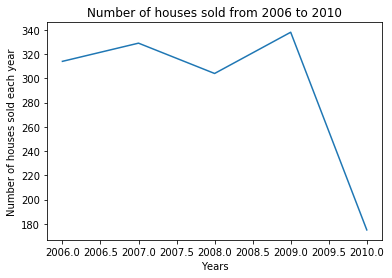

In [0]:
houses_each_year = df.groupby('YrSold').groups.values()
years = list(df.groupby('YrSold').groups.keys())
houses_per_year = [len(item) for item in houses_each_year]
plt.title('Number of houses sold from 2006 to 2010')
plt.xlabel('Years')
plt.ylabel('Number of houses sold each year')
plt.plot(years, houses_per_year)

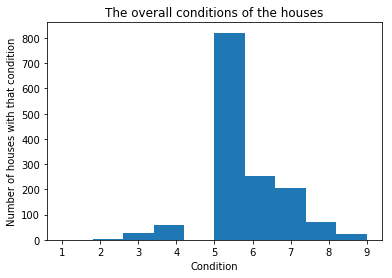

In [0]:
condition = list(df['OverallCond'])

plt.title('The overall conditions of the houses')
plt.xlabel('Condition')
plt.ylabel('Number of houses with that condition')
histogram = plt.hist(condition)

In [0]:
grouped = df.groupby('Fireplaces')

for name, group in grouped:
    mean_price = group.aggregate('mean')['SalePrice']
    mean_year = group.aggregate('mean')['YearBuilt']
    distinct_fullbath = group.nunique()['FullBath']
    print('Fireplaces: ', name, ', Mean Price: ',
          mean_price, ', Mean Age: ', 2019-mean_year, ', Distinct Fullbath: ', distinct_fullbath)

Fireplaces:  0 , Mean Price:  141331.48260869566 , Mean Age:  54.781159420289896 , Distinct Fullbath:  4
Fireplaces:  1 , Mean Price:  211843.90923076923 , Mean Age:  39.15076923076913 , Distinct Fullbath:  4
Fireplaces:  2 , Mean Price:  240588.53913043477 , Mean Age:  54.3478260869565 , Distinct Fullbath:  4
Fireplaces:  3 , Mean Price:  252000.0 , Mean Age:  38.40000000000009 , Distinct Fullbath:  2


In [0]:
filtered = df[df['MSSubClass']>60]

grouped = filtered.groupby(by=lambda x: df.iloc[x]['MSSubClass']%20==0)

for name, group in grouped:
    mean = group.aggregate('mean')['OverallQual']
    minimum = group.aggregate('min')['OverallQual']
    maximum = group.aggregate('max')['OverallQual']
    std = group.aggregate('std')['OverallQual']
    print('Divisible by 20: ', name, ', OverallQual:\n')
    print('\tMean: ', mean, ', Min: ', minimum, ', Max: ', maximum, ', Standard Deviation: ', std)
    print('\n')

Divisible by 20:  False , OverallQual:

	Mean:  5.556179775280899 , Min:  3.0 , Max:  10.0 , Standard Deviation:  1.1930547655966786


Divisible by 20:  True , OverallQual:

	Mean:  6.389908256880734 , Min:  4.0 , Max:  9.0 , Standard Deviation:  1.1110210319700953




## Feature extraction

```Load the complete version of the houses table, entitled "house_prices_larger.csv"```

In [0]:
df = pd.read_csv(r'C:\Users\t8658103\Desktop\Talpiot\Machine Learning and Data Science\ex1\house_prices_larger.csv')

df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotConfig
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,Inside
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,FR2
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,Inside
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,Corner
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,FR2
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000,Inside
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000,Inside
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000,Corner
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900,Inside
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000,Corner


```As you recall, the feature extraction process is done in order to let us describe the data in more "meaningful" manner. Add the following features to your dataframe:```
- ```LotArea in squared meters ( it's currently in units of squared feet)```
- ```1stFlrSF + 2ndFlrSF```
- ```GarageArea**0.5```
- ```LotArea / (BedroomAbvGr+1)```
- ```LotArea / (mean LotArea for houses built in that same year + 1e-5) - you might want to use``` [pandas merge function](https://www.google.com/search?q=pandas+merge&oq=pandas+merge&aqs=chrome..69i57l2j69i59l3j69i60.2080j0j9&sourceid=chrome&ie=UTF-8)
- ```Ranking of LotArea (largest house has 1, the second largest has 2 and so on)```
- ```One hot encoding of LotConfig - that is, add feature againts every value possible in LotConfig, which is 1 if the sample's LotConfig is this value and 0 otherwise (consider``` [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html))

```make a list of the names of the features you created.```

In [0]:
# Q1
lot_area_meters = np.array(df['LotArea'])*0.3048
df.insert(loc=len(df.columns), column='LotArea Meters', value=lot_area_meters)

# Q2
sumfloors = np.array(df['1stFlrSF']) + np.array(df['2ndFlrSF'])
df.insert(loc=len(df.columns), column='1stFlrSF + 2ndFlrSF', value=sumfloors)

# Q3
sqrt_garage = np.array(df['GarageArea'])**0.5
df.insert(loc=len(df.columns), column='Sqrt Garage Area', value=sqrt_garage)

# Q4
lotarea_bedroom= np.array(df['LotArea'])/(np.array(df['BedroomAbvGr'])+1)
df.insert(loc=len(df.columns), column='LotArea/(BedroomAbvGr+1)', value=lotarea_bedroom)

# Q5
lotArea = pd.merge((df.groupby('YearBuilt').mean()['LotArea'] + 1e-5).reset_index(),df,on='YearBuilt')
df['LotArea / Mean'] = lotArea['LotArea_y']/lotArea['LotArea_x']

# Q6
df.sort_values('LotArea', inplace=True)
df['Rank by LotArea'] = df['LotArea'].rank(method='min')
df = df.sort_values('Id')

# Show
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotConfig,LotArea Meters,1stFlrSF + 2ndFlrSF,Sqrt Garage Area,LotArea/(BedroomAbvGr+1),LotArea / Mean,Rank by LotArea
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,Inside,2575.5600,1710,23.409400,2112.500000,1.000000,508.0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,FR2,2926.0800,1262,21.447611,2400.000000,1.000000,756.0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,Inside,3429.0000,1786,24.657656,2812.500000,1.501327,1050.0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,Corner,2910.8400,1717,25.337719,2387.500000,0.734904,745.0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,FR2,4346.4480,2198,28.913665,2852.000000,0.955375,1310.0
5,6,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000,Inside,4302.2520,1362,21.908902,7057.500000,0.808394,1298.0
6,7,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000,Inside,3073.6032,1694,25.219040,2521.000000,1.000000,853.0
7,8,60,NaN,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000,Corner,3164.4336,2090,22.000000,2595.500000,0.975610,907.0
8,9,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900,Inside,1865.3760,1774,21.633308,2040.000000,1.024390,213.0
9,10,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000,Corner,2261.6160,1077,14.317821,2473.333333,1.100917,349.0


In [0]:
hot_encoding = pd.get_dummies(df['LotConfig'])

hot_encoding

,Corner,CulDSac,FR2,FR3,Inside
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,0,1
3,1,0,0,0,0
4,0,0,1,0,0
5,0,0,0,0,1
6,0,0,0,0,1
7,1,0,0,0,0
8,0,0,0,0,1
9,1,0,0,0,0


In [0]:
features = ['LotArea', '1stFlrSF', 'GarageArea', 'LotArea/(BedroomAbvGr+1)', 'LotArea / Mean', 'Rank by LotArea']

## Simple linear model

```Next, we will train a simple linear model, as seen in class, to predict SalePrice. Use the features you computed. Create train and test segments, normalize the data (both the features and the target) and use a linear model. Make sure you don't somehow use the test data when training your model (or when normalizing your data).```

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

C:\Users\t8658103\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\t8658103\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\t8658103\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\t8658103\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


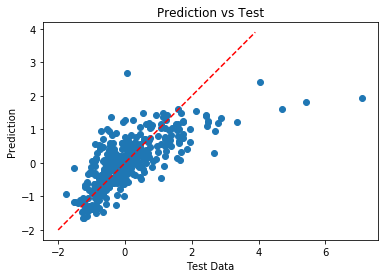

Mean Squared Error:  0.5406911954315147


In [0]:
X = df[features]
Y = np.array(df['SalePrice']).reshape(-1, 1)

scalerX = StandardScaler()
X = scalerX.fit_transform(X)

scalerY = StandardScaler()
Y = scalerY.fit_transform(Y)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y)

reg = LinearRegression()
reg.fit(X_Train, Y_Train)

prediction = reg.predict(X_Test)

plt.title('Prediction vs Test')
plt.xlabel('Test Data')
plt.ylabel('Prediction')
plt.scatter(Y_Test, prediction)
plt.plot(np.arange(-2, 4, 0.1), np.arange(-2, 4, 0.1), 'r--')
plt.show()
print('Mean Squared Error: ', mean_squared_error(prediction, Y_Test))

```Next, we will add extra features: for any feature you computed earlier, add feature**2 and feature**3. Now use Ridge regression (regularized linear regression, as we discussed in class). Draw graphs of the loss computed on the train and on the validation as a function of the regularization parameter, for``` 1$\leq\alpha\leq$30. ```What regularization would it be best to take?```

In [0]:
from sklearn.linear_model import Ridge

In [0]:
X = df[features]
Y = np.array(df['SalePrice']).reshape(-1, 1)

for feature in features:
    X['{}**2'.format(feature)]=X[feature]**2
    X['{}**3'.format(feature)]=X[feature]**3
    
scalerX = StandardScaler()
X = scalerX.fit_transform(X)

scalerY = StandardScaler()
Y = scalerY.fit_transform(Y)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y)

start = 0.1
end = 31
step = 0.1

train_err = []
test_err = []

for i in np.arange(start, end, step):
    reg = Ridge(alpha=i, normalize=True)
    reg.fit(X_Train, Y_Train)

    train_err.append((i, mean_squared_error(reg.predict(X_Train), Y_Train)))
    test_err.append((i, mean_squared_error(reg.predict(X_Test), Y_Test)))

C:\Users\t8658103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\t8658103\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\t8658103\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\t865

[]

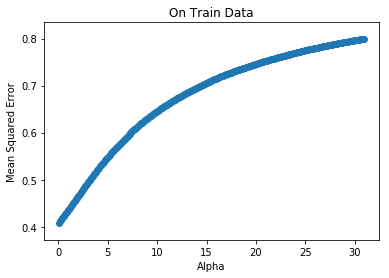

In [0]:
plt.title('On Train Data')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.scatter([i for i, j in train_err], [j for i, j in train_err])
plt.plot()

[]

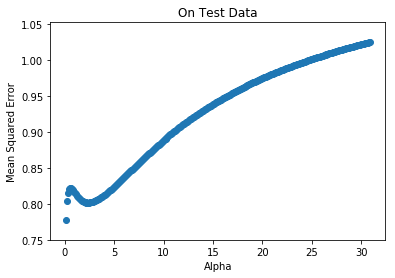

In [0]:
plt.title('On Test Data')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.scatter([i for i, j in test_err], [j for i, j in test_err])
plt.plot()